# Prediction Using Supervised ML
### Author : Shubhranshu Shivam

#### In this task, we are going to predict the percentage of marks scored by a student by studying for certain number of hours
##### This is a simple linear regression as it involves just 2 variables 
##### Dataset used - http://bit.ly/w-data


In [1]:
# importing all the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading dataset from the given URL

student_data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print("Successfully loaded data...\n")
print(student_data.head())

Successfully loaded data...

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


#### Now, we are creating a 2-D plot of the dataset to see if we can manually find any relationship.

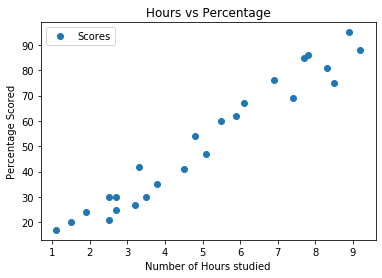

In [3]:
# plotting the dataset

student_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Number of Hours studied')
plt.ylabel('Percentage Scored')
plt.show()

### Preparing the data 
#### The next step involves dividing the data into attributes and labels

In [4]:
# preparing the dataset

X = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


#### Now as we have our data divided into attributes and labels. Next step is to split the data into training sets and validation sets. To do this I am using the Scikit Learn package

In [5]:
# importing and splitting of datasets

from sklearn.model_selection import train_test_split

x_train, val_x, y_train, val_y = train_test_split(X, y, random_state=0)

### Training the Algorithm
#### Now as we have divided our dataset, its time to train our algorithm. I am using the ScikitLearn package to do this

In [6]:
# importing and training the linear regression model

from sklearn.linear_model import LinearRegression

student_model = LinearRegression()
student_model.fit(x_train, y_train)

LinearRegression()

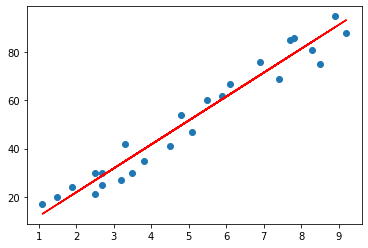

In [7]:
# Plotting the regression line

line = student_model.coef_*X + student_model.intercept_

# Plotting the test data

plt.scatter(X,y)
plt.plot(X, line, color='red')
plt.show()

###  Making Predictions

#### Now I am goint to predict the values based on the model trained

In [8]:
# predicting the values

print(val_x)
y_pred = student_model.predict(val_x)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]
[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [9]:
# comparing actual vs. predicted

df = pd.DataFrame({'Original': val_y, 'Predicted':y_pred})
df

,Original,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [10]:
# testing with our own data. 
# 9.25 hours in this case as it is given in the task.
hrs = [[9.25]]
user_pred = student_model.predict(hrs)
print("Number of hours=",hrs)
print("Percentage Scored=",user_pred)

Number of hours= [[9.25]]
Percentage Scored= [93.89272889]


### Evaluating the Model

#### Calculating the Mean Absolute Error to determine the performance of the model.


In [11]:
# importing the mean_absolute_error function from Scikit Learn package and evaluating the performance

from sklearn.metrics import mean_absolute_error
print("The MAE is",mean_absolute_error(val_y,y_pred))

The MAE is 4.130879918502486
